# Dataset Exploration of Kaggle ECG Heartbeat Dataset

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [Section 1]()
  - [Subsection 1]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
  - [Subsection 2]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
- [Section 2]()
  - [Subsection 1]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
  - [Subsection 2]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Intro

Welcome to the second Jupyter Notebook of the **HeartBeatInsight** Project! In this Notebook, we will perform a **detailed exploration** of the [Kaggle ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat). Our goal is to understand the dataset **inside out** through various data exploration techniques. By the end of this section, you'll know every detail of this dataset — its structure, distribution, features, and potential challenges.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Dataset Overview

Let's begin by loading and examining the dataset.

## 🔗 Dataset Link

[**Kaggle ECG Heartbeat Dataset**](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

## 📥 Download and Load the Dataset

First, download the dataset from Kaggle.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print(f"Path to dataset files: {path}")

100%|██████████| 98.8M/98.8M [00:04<00:00, 22.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


Now, move the downloaded dataset to /content folder.

In [2]:
import os
import shutil

# Define the source and destination paths
source_path = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1"
destination_path = "/content"

# Ensure the destination directory exists
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# List all files and directories in the source path
for item in os.listdir(source_path):
    # Construct full file paths
    source_item = os.path.join(source_path, item)
    destination_item = os.path.join(destination_path, item)

    # Move the file or directory
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.move(source_item, destination_item)

print("Files and directories have been moved to /content.")
print(f"Content of /content: \n{os.listdir('/content')}")

Files and directories have been moved to /content.
Content of /content: 
['.config', 'ptbdb_normal.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'mitbih_test.csv', 'sample_data']


Now, import the necessary libraries and load the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from collections import Counter

# Load the training and testing datasets
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

# Display the first few rows of the training dataset
train_df.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 📝 Dataset Structure

- **Rows:** Each row represents an individual heartbeat segment.

- **Columns:**

    - The first **187 columns** are the time-series values of the ECG signal.
    
    - The **188th column** is the label (heartbeat class).

## 📋 Summary of Classes

| Class Label | Class Description | Code |
| :---------- | :---------------- | :--- |
| **0** | Normal Beat | **N** |
| **1** | Supraventricular Ectopic Beat | **S** |
| **2** | Ventricular Ectopic Beat | **V** |
| **3** | Fusion Beat | **F** |
| **4** | Unknown Beat | **Q** |

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Initial Data Inspection

## ✅ Check Dataset Size

In [4]:
print(f"Training Set Shape: {train_df.shape}")
print(f"Testing Set Shape: {test_df.shape}")

Training Set Shape: (87553, 188)
Testing Set Shape: (21891, 188)


## ✅ Check for Missing Values

In [5]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


**Interpretation:** If the result is **0**, the dataset has no missing values.

## ✅ Class Distribution in Training and Testing Sets

In [6]:
train_labels = train_df.iloc[:, -1]
test_labels = test_df.iloc[:, -1]

# Count the occurrences of each class
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

print(f"Training Set Class Distribution: {train_class_counts}")
print(f"Testing Set Class Distribution: {test_class_counts}")

Training Set Class Distribution: Counter({0.0: 72470, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})
Testing Set Class Distribution: Counter({0.0: 18117, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})


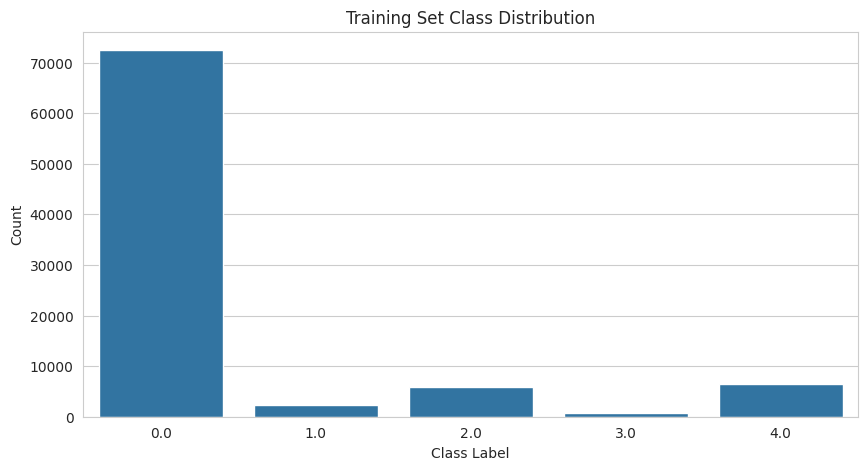

In [7]:
# Plot the Training Set Class Distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels)
plt.title("Training Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

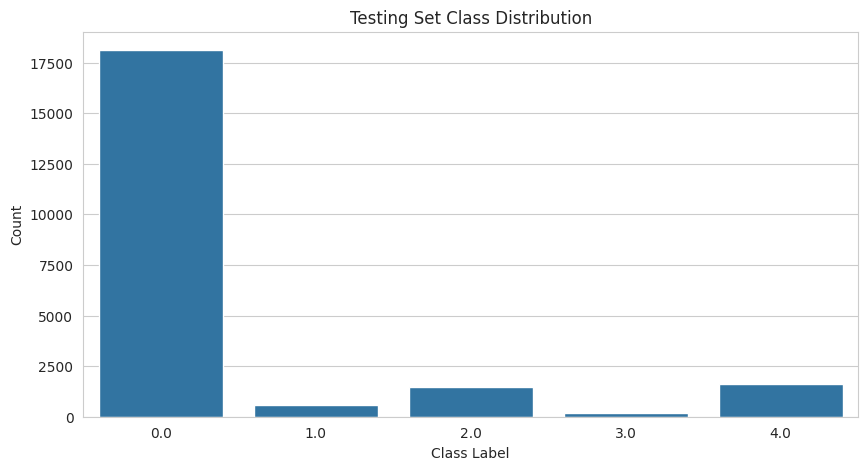

In [8]:
# Plot the Testing Set Class Distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x=test_labels)
plt.title("Testing Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

### 📝 Observations

- Notice the **imbalance** in class distribution. Some classes have far fewer samples than others.

- This imbalance may affect model performance, requiring techniques like **resampling** or **class weighting**.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Visualizing ECG Signals

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

## 🔗 Dataset Link

Difficulty: ${\color{green}{Easy}}$
Difficulty: ${\color{orange}{Medium}}$
Difficulty: ${\color{red}{Hard}}$

In [ ]:
# Deep Learning as subset of ML

from IPython import display
display.Image("data/images/ML.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)